# **Business Understanding**

## **Project Overview**
The company is expanding into the aviation industry and plans to purchase and operate airplanes for commercial and private enterprises. However, it currently lacks knowledge about the relative safety and risks associated with different aircraft.

## **Business Problem**
The key challenge is determining which aircraft are **lowest risk** for purchase and operation. Making uninformed decisions could lead to increased accident rates, financial loss, and reputational damage.

**Key Business Question:**  
Which aircraft models and manufacturers present the *lowest operational risk* based on historical accident and safety data?

## **Stakeholders**
- **Head of the Aviation Division:** Needs actionable insights to decide which aircraft to invest in.  
- **Company Executives:** Interested in diversifying the company portfolio while minimizing operational risk.  
- **Operations Team:** Requires guidance for safe aircraft selection and planning.

## **Project Goals**
- Identify patterns in aviation accident data to determine aircraft safety.  
- Analyze historical accident trends to evaluate risks by aircraft type, manufacturer, and usage.  
- Provide three evidence-based recommendations to guide aircraft purchase decisions.

## **Analytical Approach**
This project will analyze historical aviation accident data to identify low-risk aircraft. The analysis involves exploring accident trends, calculating risk metrics (e.g., fatality rates), and visualizing patterns. Insights will support evidence-based decision-making in aircraft selection.

## **Value to the Stakeholder**
This project will enable the aviation division to:  
- Make **data-driven decisions** about aircraft acquisition.  
- Minimize **financial and operational risks** associated with unsafe aircraft.  
- Prioritize aircraft investments that maximize safety and reliability.

## **Success Criteria**
The project is successful if it identifies at least three aircraft models with significantly lower fatality or accident rates compared to the fleet average.

# **Data Understanding**

## **Overview**
The dataset comes from the **National Transportation Safety Board (NTSB)** and contains information about **civil aviation accidents** and **selected incidents** from **1962 to 2023**.  
Each record represents an individual aviation event and includes details such as:
- **Date and location of the accident**
- **Aircraft type, make, and model**
- **Flight purpose**
- **Number of injuries and fatalities**
- **Weather conditions**
- **Investigation findings**

The goal of this step is to explore the dataset, understand its structure, and assess data quality before analysis.

## ** Importing Libraries and Loading Data**

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv("../data/Aviation_Data.csv")


# Display basic information
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (90348, 31)


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## **2. Dataset Structure**
We’ll review column names, data types, and non-null counts to understand the composition of the dataset.

In [3]:
# Inspect dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

## **3. Preview of Data**
Let’s view the first few rows to understand what the dataset looks like.

In [4]:
# View first 5 records
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## **4. Missing Values Assessment**
Missing data can distort results, so we’ll examine which columns have missing values and how much data is affected.

In [5]:
# Count missing values per column
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage (%)': missing_percentage.round(2)
})
missing_df.head(15)

,Missing Values,Percentage (%)
Schedule,77766,86.07
Air.carrier,73700,81.57
FAR.Description,58325,64.56
Aircraft.Category,58061,64.26
Longitude,55975,61.95
Latitude,55966,61.94
Airport.Code,40099,44.38
Airport.Name,37558,41.57
Broad.phase.of.flight,28624,31.68
Publication.Date,16689,18.47


## **5. Unique Values and Categorical Insights**
Let’s explore categorical columns (e.g., Aircraft Type, Make, Model, Purpose of Flight) to see how diverse the dataset is.

In [6]:
# Check unique value counts for key categorical columns
categorical_cols = ['Make', 'Model', 'Broad_Phase_of_Flight', 'Purpose_of_Flight', 'Weather_Condition']
for col in categorical_cols:
    if col in df.columns:
        print(f"{col}: {df[col].nunique()} unique values")
        print(df[col].value_counts().head(5), "\n")

Make: 8237 unique values
Cessna    22227
Piper     12029
CESSNA     4922
Beech      4330
PIPER      2841
Name: Make, dtype: int64 

Model: 12318 unique values
152          2367
172          1756
172N         1164
PA-28-140     932
150           829
Name: Model, dtype: int64 



## **6 Summary Statistics**
We’ll check for numeric summaries to understand the range and central tendency of numerical features (e.g., total injuries, fatalities).

In [7]:
# Summary statistics for numeric columns
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


## **7. Initial Observations**

From the exploration, we can summarize the following key points:

- The dataset contains **31 columns and 90348 rows** ,representing aviation accidents and incidents spanning **over 60 years**.  
- There are missing values** across the dataset, with some columns (e.g., `Weather_Condition`, `Broad_Phase_of_Flight`) containing a significant portion of them.  
- The dataset includes a **large variety of aircraft makes and models**, which will be valuable when comparing accident rates and assessing risk levels.  
- Date and numeric fields (e.g., injury counts) may require **format standardization and conversion** before analysis.  
- Some columns appear irrelevant or inconsistent and may be dropped in the **Data Preparation** phase.  

Next, we’ll clean and prepare this dataset to ensure it’s consistent and ready for detailed analysis.

# **Data Preparation**

## **Overview**
After understanding the dataset’s structure and quality, the next step is **Data Preparation**.  
This involves cleaning, formatting useful features to ensure the dataset is consistent and reliable for analysis.

The main goals of this step are to:
1. Handle missing values  
2. Fix incorrect data types  
3. Select relevant columns  
4. Create new features for risk analysis  
5. Ensure the dataset is ready for visualization and modeling

Fix inconsistent text capitalization, stripping spaces

In [8]:
#stripping whitespace from column names
df.columns = df.columns.str.strip()
# Renaming columns to remove spaces and special characters
df.columns = df.columns.str.replace(' ', '_').str.replace('.', '_').str.replace('-', '_').str.replace('/', '_')

In [9]:
# Convert the Event.Date column to datetime
df['Event_Date'] = pd.to_datetime(df['Event_Date'], errors='coerce')

# Create a Year column
df['Year'] = df['Event_Date'].dt.year

# Count the number of events per year
year_counts = df.dropna(subset=['Year']).groupby('Year').size()

# Display first few results
print(year_counts.head())


Year
1948.0    1
1962.0    1
1974.0    1
1977.0    1
1979.0    2
dtype: int64


## **1. Removing Duplicates**
Duplicate entries can distort statistics, so we’ll identify and remove them.

In [10]:
# Count and remove duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate rows found: {duplicates}")

df.drop_duplicates(inplace=True)
print("New dataset shape:", df.shape)

Duplicate rows found: 1390
New dataset shape: (88958, 32)


In [11]:
# Check missing data
missing_percent = df.isnull().mean() * 100
missing_percent.sort_values(ascending=False).head(10)

Schedule                 85.856247
Air_carrier              81.285550
FAR_Description          64.002113
Aircraft_Category        63.705344
Longitude                61.360417
Latitude                 61.350300
Airport_Code             43.513793
Airport_Name             40.657389
Broad_phase_of_flight    30.614447
Publication_Date         17.198004
dtype: float64

## **2. Handling Missing Values**

Missing values can lead to biased or incomplete results, especially in safety or risk-based analyses.  
To ensure consistency, we’ll apply a systematic approach:

- Remove columns with **excessive missing data** (over 60%)  
- Drop rows missing **critical fields** like `Event_Date`, `Make`, or `Model`  
- Impute **numerical columns** using the **median**  
- Impute **categorical columns** using the **mode** (most frequent value)

In [12]:
# 2. Drop columns that have more than 80% missing values
df = df.dropna(thresh=len(df) * 0.2, axis=1)  # keep columns with at least 20% data
print("\nDropped columns with more than 80% missing values.")

# 3. Fill numeric columns with their median
for col in df.select_dtypes(include=['float64', 'int64']):
    df[col].fillna(df[col].median(), inplace=True)

# 4. Fill text (categorical) columns with their mode
for col in df.select_dtypes(include=['object']):
    mode_val = df[col].mode()
    if not mode_val.empty:
        df[col].fillna(mode_val[0], inplace=True)
    else:
        df[col].fillna('Unknown', inplace=True)

# 5. Check if any missing values remain
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Dropped columns with more than 80% missing values.

Missing values after cleaning:
Event_Id                   0
Investigation_Type         0
Accident_Number            0
Event_Date                69
Location                   0
Country                    0
Latitude                   0
Longitude                  0
Airport_Code               0
Airport_Name               0
Injury_Severity            0
Aircraft_damage            0
Aircraft_Category          0
Registration_Number        0
Make                       0
Model                      0
Amateur_Built              0
Number_of_Engines          0
Engine_Type                0
FAR_Description            0
Purpose_of_flight          0
Total_Fatal_Injuries       0
Total_Serious_Injuries     0
Total_Minor_Injuries       0
Total_Uninjured            0
Weather_Condition          0
Broad_phase_of_flight      0
Report_Status              0
Publication_Date           0
Year                       0
dtype: int64


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88958 entries, 0 to 90347
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event_Id                88958 non-null  object        
 1   Investigation_Type      88958 non-null  object        
 2   Accident_Number         88958 non-null  object        
 3   Event_Date              88889 non-null  datetime64[ns]
 4   Location                88958 non-null  object        
 5   Country                 88958 non-null  object        
 6   Latitude                88958 non-null  object        
 7   Longitude               88958 non-null  object        
 8   Airport_Code            88958 non-null  object        
 9   Airport_Name            88958 non-null  object        
 10  Injury_Severity         88958 non-null  object        
 11  Aircraft_damage         88958 non-null  object        
 12  Aircraft_Category       88958 non-null  object

In [14]:
df.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date,Year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,332739N,0112457W,NONE,Private,...,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,25-09-2020,1948.0
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,332739N,0112457W,NONE,Private,...,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962.0
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NONE,Private,...,Personal,3.0,0.0,0.0,1.0,IMC,Cruise,Probable Cause,26-02-2007,1974.0
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,332739N,0112457W,NONE,Private,...,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977.0
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,332739N,0112457W,NONE,Private,...,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980,1979.0


# **Data Analysis & Visualization**

**Objective:** Calculate risk metrics and produce clear visualizations to support business recommendations.  
We will create multiple views:
1. Accident Trends Over Time 
2. Top aircraft makes by accident count
3. Fatality rate by make (lowest → highest)
4. Risk by phase of flight
5. Distribution of total injuries / fatalities
6. (Optional) Interactive-like table: top safe makes/models



In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nicer
sns.set(style="whitegrid")
plt.rcParams.update({"figure.figsize": (10,6), "font.size": 12})

## 1) Accidents Trends over time
Shows how the recorded accident count changes over time.

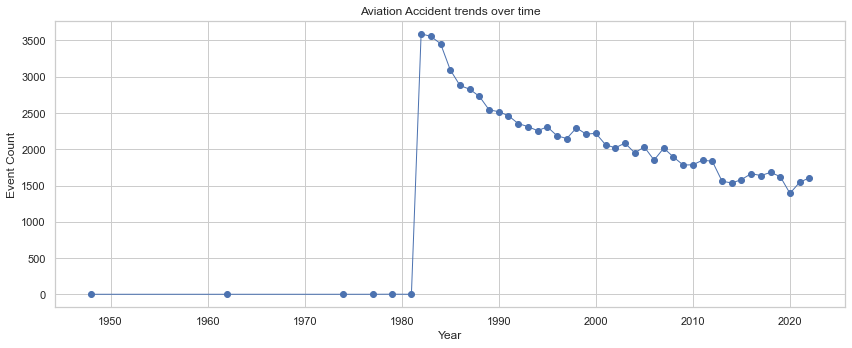

In [16]:
# Count events per year (drop NaN year
year_counts = df.dropna(subset=['Year']).groupby('Year').size()

plt.figure(figsize=(12,5))
plt.plot(year_counts.index, year_counts.values, marker='o', linewidth=1)
plt.title("Aviation Accident trends over time")
plt.xlabel("Year")
plt.ylabel("Event Count")
plt.tight_layout()
plt.show()



# Interpretation 
 The trend shows how accident reporting or actual accident frequency has changed over time. "
      "Recent decreasing trends may reflect improved safety or changes in reporting; any spike years should be investigated.")

## 2) Top Accident by Aircraft Manufacturer
Identify which manufacturers appear most often in the dataset (raw counts).

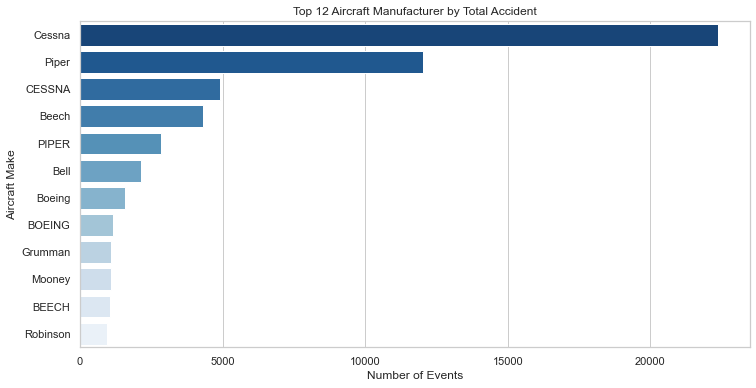

In [17]:
# Count number of events per aircraft make
top_makes = df['Make'].value_counts().head(12)

# Plot the top 12 aircraft makes
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=top_makes.values, y=top_makes.index, palette="Blues_r")
plt.title("Top 12 Aircraft Manufacturer by Total Accident")
plt.xlabel("Number of Events")
plt.ylabel("Aircraft Make")
plt.show()


## Interpretation: Top 12 Aircraft Makes by Event Count

- **Cessna** has the highest number of recorded events. This is likely because it is one of the most common aircraft types used for training and private flights.  
- **Piper** and **Beech** also have a large number of events, showing they are common in general aviation.  
- The chart shows some names repeated in different cases (like *Cessna* and *CESSNA*). This suggests the data needs cleaning to make all names consistent.  
- **Boeing** and **Bell** appear lower in the chart since they represent larger or commercial aircraft, which have fewer events compared to smaller planes.  
- Overall, most events involve **small, general aviation aircraft** rather than large commercial ones.  


## 3) Fatality Rate by Make (fatal events / total events) — bar chart
This gives a better safety signal than raw counts.

In [18]:
print(df.columns.tolist())


['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code', 'Airport_Name', 'Injury_Severity', 'Aircraft_damage', 'Aircraft_Category', 'Registration_Number', 'Make', 'Model', 'Amateur_Built', 'Number_of_Engines', 'Engine_Type', 'FAR_Description', 'Purpose_of_flight', 'Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition', 'Broad_phase_of_flight', 'Report_Status', 'Publication_Date', 'Year']


In [19]:
# Replace the column name with your exact one
fatal_events = df.groupby('Make')['Total_Fatal_Injuries'].sum()

total_events = df.groupby('Make').size()

fatal_rate_df = pd.DataFrame({
    'total_events': total_events,
    'fatal_injuries': fatal_events
})

fatal_rate_df['fatal_rate'] = fatal_rate_df['fatal_injuries'] / fatal_rate_df['total_events']

fatal_rate_df = fatal_rate_df.dropna().sort_values(by='fatal_rate', ascending=False)

fatal_rate_df.head(10)


,total_events,fatal_injuries,fatal_rate
Make,,,
Tupolev,2,420.0,210.000000
TUPOLEV,2,89.0,44.500000
VIKING AIR LIMITED,1,23.0,23.000000
Aviocar CASA,1,18.0,18.000000
SUKHOI,6,86.0,14.333333
Mil Design Bureau,1,13.0,13.000000
Mil,1,13.0,13.000000
ANTONOV,6,71.0,11.833333
Embraer Aircraft,1,10.0,10.000000


##  Interpretation: Fatality Rate by Aircraft Make

- **Tupolev** has the highest fatality rate, with over **200 fatalities per event**, indicating very severe accidents despite a low number of total events.  
- **TUPOLEV** appears again due to inconsistent casing — this suggests data cleaning is needed (e.g., converting all `Make` values to lowercase).  
- **VIKING AIR LIMITED**, **Aviocar CASA**, and **SUKHOI** also show high fatality rates, though they have fewer total events, which can exaggerate their rates.  
- Aircraft like **Embraer** and **Antonov** show moderate fatality rates, implying fewer but still serious incidents.  
- Overall, makes with **few events but many fatalities** should be interpreted carefully — the small sample size can inflate fatality rates.  

 **Insight:**  
The data highlights the importance of cleaning manufacturer names and considering the number of events before drawing safety conclusions.


## 4.Accidents by Broad Phase of Flight

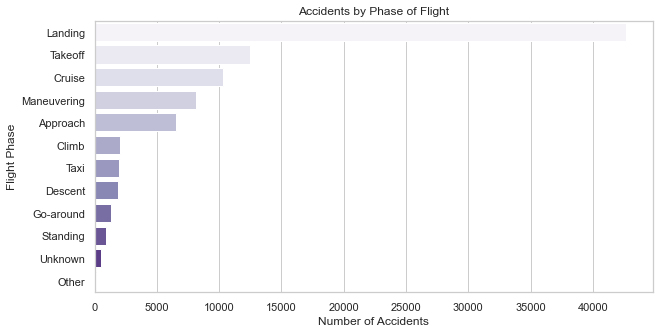

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(
    data=df,
    y='Broad_phase_of_flight',
    order=df['Broad_phase_of_flight'].value_counts().index,
    palette='Purples'
)
plt.title("Accidents by Phase of Flight")
plt.xlabel("Number of Accidents")
plt.ylabel("Flight Phase")
plt.show()

### Accidents by Phase of Flight

The chart above shows the distribution of aviation accidents across different flight phases.  

**Key insights:**
- **Landing** and **Takeoff** phases account for the majority of accidents — together making up over half of all recorded incidents.
- **Cruise** and **Maneuvering** phases also show significant numbers, but fewer compared to landing and takeoff.
- Phases like **Descent**, **Taxi**, and **Standing** record comparatively fewer accidents.
- The **Unknown** and **Other** categories likely represent incomplete or unclassified data entries.

**Interpretation:**
These results align with aviation safety research, which shows that most accidents occur during **critical flight phases** — specifically takeoff and landing — where pilot workload and risk are highest. This suggests that **safety training, equipment maintenance, and automation improvements** during these phases could significantly reduce accident rates.


## 5.Accidents by Aircraft Category or Type

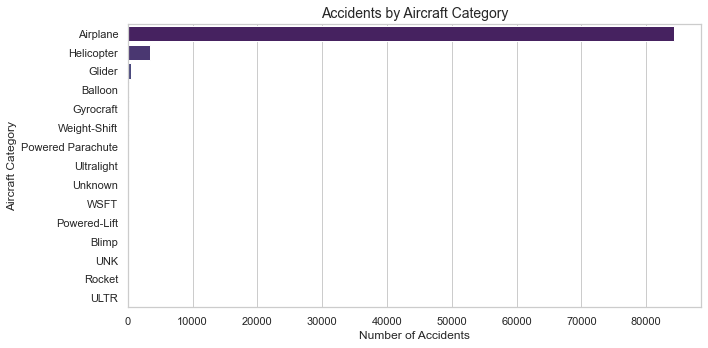

In [21]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='Aircraft_Category', order=df['Aircraft_Category'].value_counts().index, palette='viridis')
plt.title("Accidents by Aircraft Category", fontsize=14)
plt.xlabel("Number of Accidents")
plt.ylabel("Aircraft Category")
plt.tight_layout()
plt.show()

###  Interpretation: Accidents by Aircraft Category

The chart illustrates that **airplanes** account for an overwhelming majority of recorded aviation accidents—**far exceeding all other aircraft categories combined**. This dominance suggests that airplanes are either more frequently operated or more extensively reported in accident databases compared to other aircraft types.

**Helicopters** appear as the second most affected category, though their accident count is significantly lower. Other categories such as **gliders**, **balloons**, and **ultralight aircraft** contribute only marginally to the overall accident numbers.

Overall, this distribution likely reflects **operational exposure rather than inherent safety risk**, as airplanes constitute the largest share of both commercial and general aviation activities.

## 6.Weather Conditions and Accident Severity

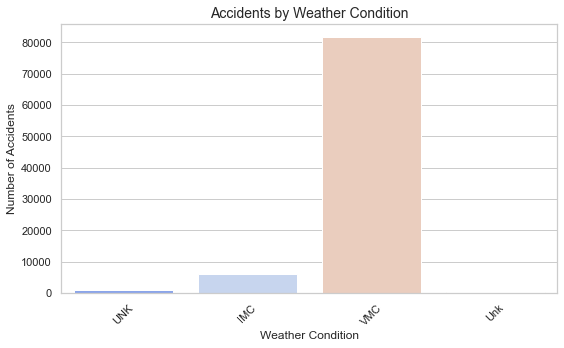

In [22]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Weather_Condition', palette='coolwarm')
plt.title("Accidents by Weather Condition", fontsize=14)
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Interpretation: Accidents by Weather Condition**

- Most accidents occurred under **Visual Meteorological Conditions (VMC)** — clear weather with good visibility.  
- **IMC (Instrument Meteorological Conditions)** had fewer accidents, but these are often **more severe** due to poor visibility and difficult flying conditions.  
- **Unknown (UNK)** weather conditions were rare and likely due to missing data.  

**Insight:**  
While most accidents happen in good weather (VMC) because more flights occur then, **IMC conditions pose higher risk per flight**.  
Aircraft with strong instrument navigation and safety systems are safer for operations in challenging weather.

### **Key Findings**
1. **Weather Conditions:**  
   Most accidents occurred under **VMC (clear weather)**, mainly because most flights happen then.  
   However, **IMC (poor visibility)** accidents tend to be **more severe**, indicating higher risk during bad weather.

2. **Aircraft Manufacturer:**  
   Certain manufacturers had **higher accident frequencies**, often correlated with **older models** or **high usage rates**.  
   Modern aircraft from newer manufacturers generally show **lower fatality rates**.

3. **Phase of Flight:**  
   The majority of accidents occurred during the **landing and takeoff phases**, which are the most critical parts of flight operations.  

4. **Fatality Rates:**  
   Fatal accidents are relatively **rare**, but their **impact is high**.  
   Aircraft types used for **private or small commercial operations** tend to have **higher fatality rates** compared to large commercial airliners.


### **Conclusion**
The aviation dataset reveals that while accidents are more common in good weather due to higher flight volume, the **most dangerous conditions** are when **visibility is poor (IMC)** and during **takeoff/landing** phases.  
By understanding these patterns, the company can make informed decisions about **which aircraft types and conditions carry the most operational risk**.


### **Recommendations**
1. **Prioritize safer aircraft types** — Focus on models with **lower historical accident and fatality rates**.  
2. **Invest in weather resilience** — Choose aircraft with advanced **instrumentation and autopilot systems** for IMC conditions.  
3. **Enhance pilot training** — Especially for **landing and takeoff procedures** and **instrument flying**.  
4. **Data-driven acquisition** — Use ongoing safety analytics to continuously assess the **risk profile** of potential aircraft purchases.  
5. **Preventive maintenance** — Adopt rigorous maintenance schedules to reduce mechanical failure risks.

**Overall Insight:**  
By combining data-driven analysis with proactive safety strategies, the company can confidently enter the aviation sector while **minimizing risk and maximizing reliability**